In [12]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from empmap.collate_map import EmpiricalMap
from empmap.poly_fit import mu_fit_selector
from empmap.potential import Potential1D
from empmap.sincdvr import DVR
from empmap.constants import ConstantsManagement

In [13]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.titlesize']=16
rcParams['font.size']=12
rcParams['axes.titlesize']=16
rcParams['axes.labelsize']=24
rcParams['figure.labelsize']=28
rcParams['xtick.labelsize']=16
rcParams['ytick.labelsize']=16
rcParams['axes.linewidth'] = 1.5
rcParams['lines.markersize']=4
rcParams['lines.linewidth']=2.5
rcParams['xtick.major.size'] = 5
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.size'] = 5
rcParams['ytick.major.width'] = 1
rcParams['xtick.bottom'] = True
rcParams['xtick.top']=True
rcParams['xtick.direction']="in"
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['ytick.direction']="in"
rcParams['svg.fonttype'] = 'none'

In [32]:
new_map = EmpiricalMap.load_self("example_maps/doh_d2o_gas.pckl")
new_map.fit_full_empirical_map(order_omega=2, order_x=1)
print("******* Fit R^2 Values ********")
for key in new_map.map_fit_parameters.keys():
    print(f"{key:} {new_map.map_fit_parameters[key][2]:10.5f}")

w01 =  3761.3997 + -6272.9358*Eproj + -49548.7190*Eproj^2
w12 =  3606.9366 + -6912.4347*Eproj + -68924.9714*Eproj^2
x01 =     0.1939 +    -0.0000*w01
x12 =     0.2699 +    -0.0000*w12
dmu_num =     0.6073 +    62.2071*Eproj +  -119.2355*Eproj^2
dmu_num =     0.8935 +   108.3043*E +  -270.6767*E^2
w01    0.76956
w12    0.77593
x01    0.99851
x12    0.99810
dmu_num    0.84922
dmu_num_scaled    0.84942


w01 =  3761.3997 + -6272.9358*E + -49548.7190*E^2


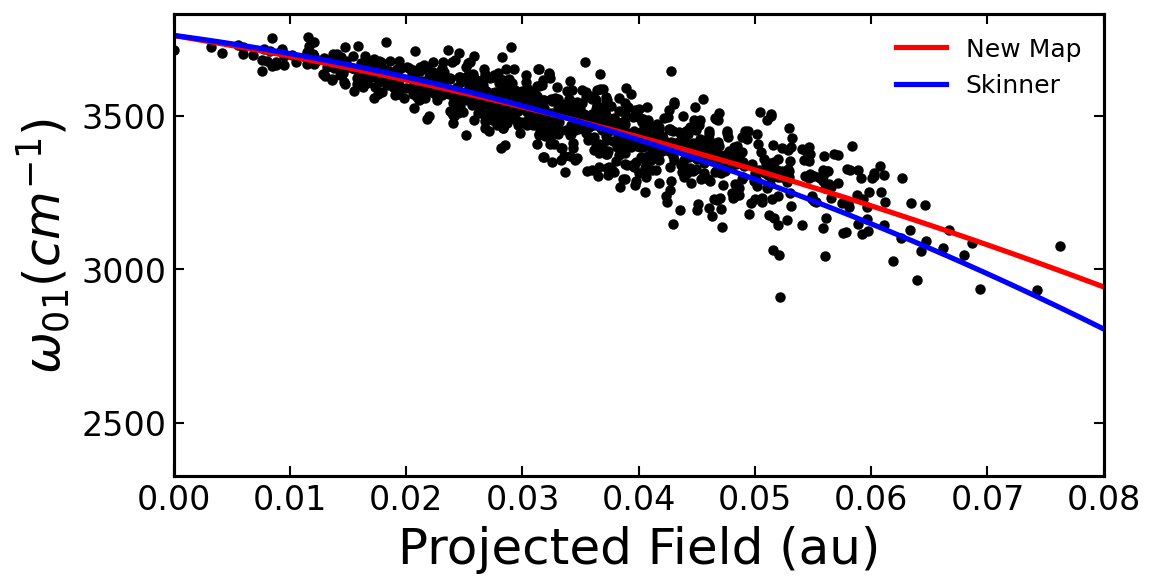

In [15]:
poly, popt, pcov = new_map.fit_attribute_of_map("w01", 2)
evals = np.linspace(0.0, 0.10, 100)
yvalues = poly(evals, *popt)
skinner = poly(evals, 3762, -5060, -86225)

fig = plt.figure(figsize=(8,4),dpi=150)
plt.scatter(new_map.Eproj, new_map.w01, c='black')
plt.plot(evals, yvalues, c='red', label='New Map')
plt.plot(evals, skinner, c='blue', label='Skinner')
plt.xlabel("Projected Field (au)")
plt.ylabel("$\omega_{01} (cm^{-1})$")
plt.legend(frameon=False)
plt.xlim(0, 0.08)
plt.show()

w12 =  3606.9366 + -6912.4347*E + -68924.9714*E^2


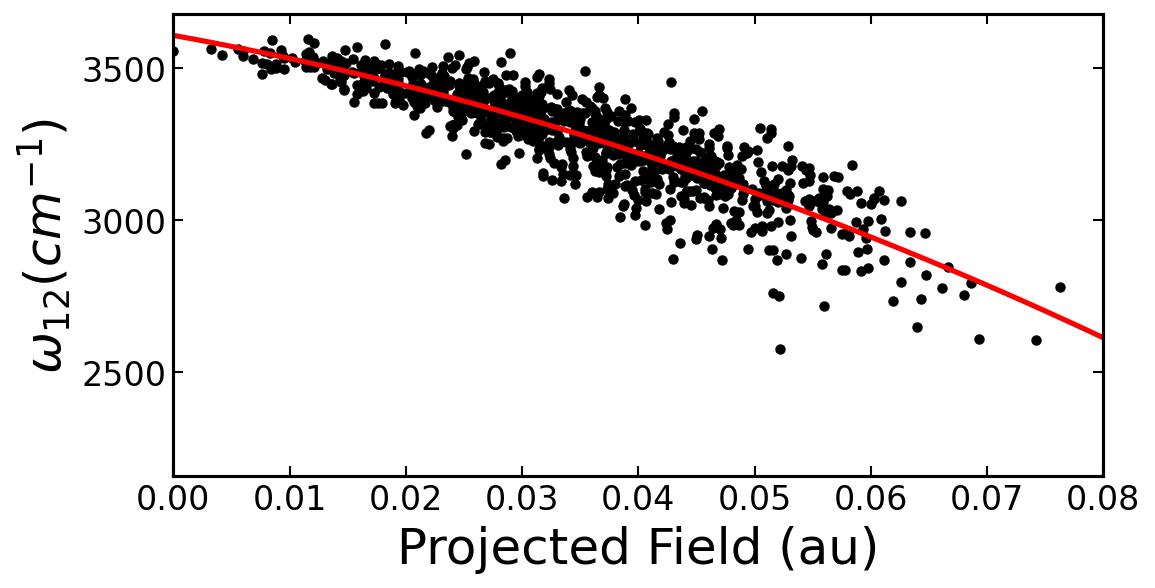

In [16]:
poly, popt, pcov = new_map.fit_attribute_of_map("w12", 2)
evals = np.linspace(0.0, 0.10, 100)
yvalues = poly(evals, *popt)

fig = plt.figure(figsize=(8,4), dpi=150)
plt.scatter(new_map.Eproj, new_map.w12, c='black')
plt.plot(evals, yvalues, c='red')
plt.xlabel("Projected Field (au)")
plt.ylabel("$\omega_{12} (cm^{-1})$")
plt.xlim(0, 0.08)
plt.show()

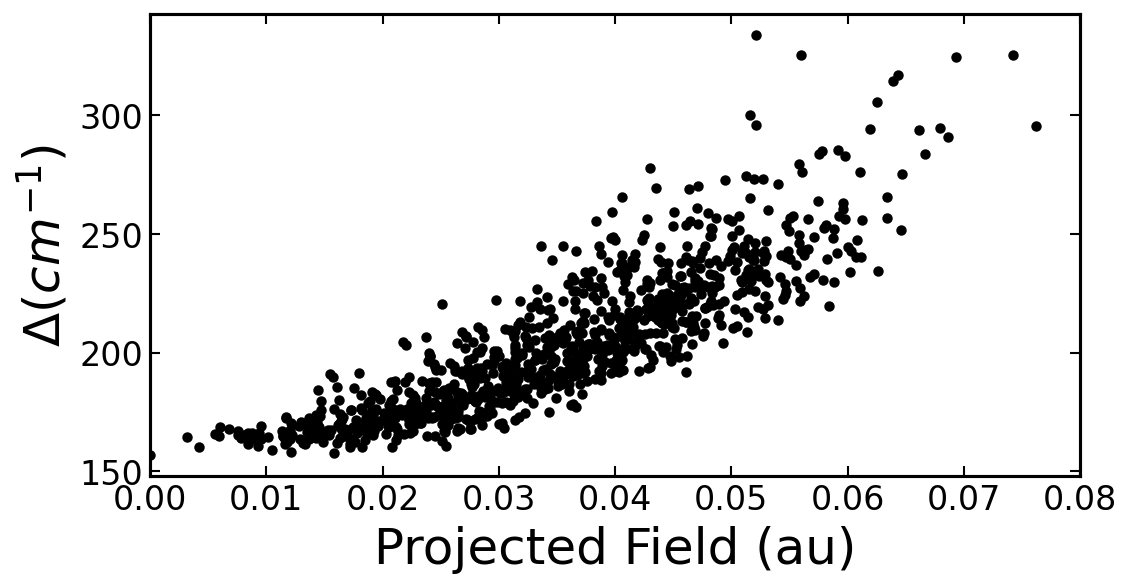

In [17]:
fig = plt.figure(figsize=(8,4),dpi=150)
plt.scatter(new_map.Eproj, np.array(new_map.w01)-np.array(new_map.w12), c='black')
plt.xlabel("Projected Field (au)")
plt.ylabel("$\Delta (cm^{-1})$")
plt.xlim(0, 0.08)
plt.show()

dmu_num =     0.7214 +    54.1443*E


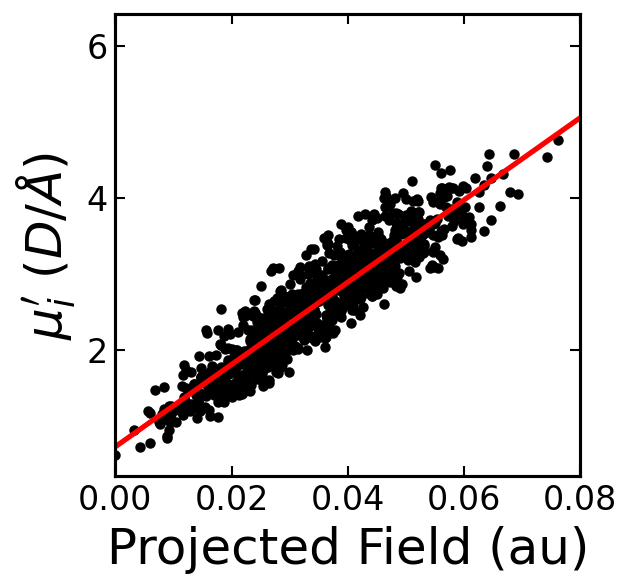

In [18]:
poly, popt, pcov = new_map.fit_attribute_of_map("dmu_num", 1)
evals = np.linspace(0.0, 0.10, 100)
yvalues = poly(evals, *popt)

fig = plt.figure(figsize=(4,4),dpi=150)
plt.scatter(new_map.Eproj, new_map.dmu_num, c='black')
plt.plot(evals, yvalues, c='red')
plt.xlabel("Projected Field (au)")
plt.ylabel("$\mu_i'~(D/\AA)$")
plt.xlim(0, 0.08)
plt.show()

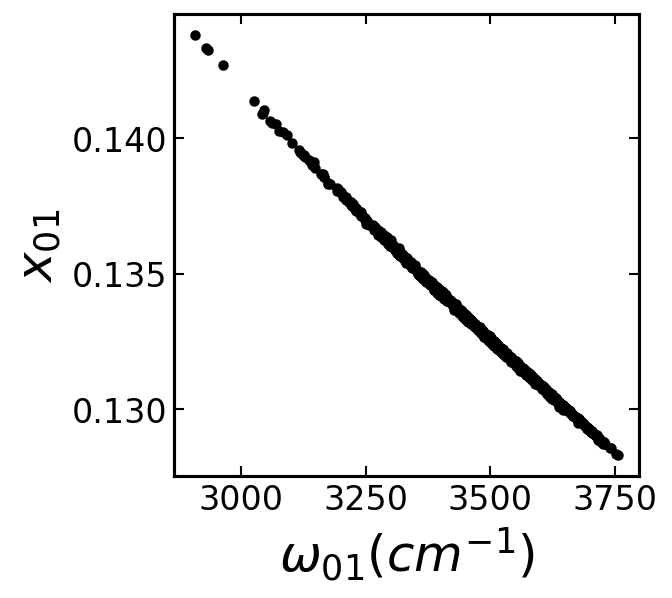

In [19]:
fig = plt.figure(figsize=(4,4),dpi=150)
plt.scatter(new_map.w01, new_map.x01, c='black')
plt.xlabel("$\omega_{01} (cm^{-1})$")
plt.ylabel("$x_{01} $")
plt.show()

## Build a Potential for a Gas Phase Molecule

In [20]:
pot1d = Potential1D("example_potential/scan_rOHs.dat", "example_potential/scan_energies.dat", "example_potential/scan_dipoles.dat", "example_potential/scan_eOHs.dat")
pot1d.fit_potential_to_poly(8)
pot1d.fit_dipole_to_poly(3)

dvr = DVR(pot1d, emax=10.0, xmax=2.1, mass1=2.0014, mass2=15.999)
dvr.do_calculation()

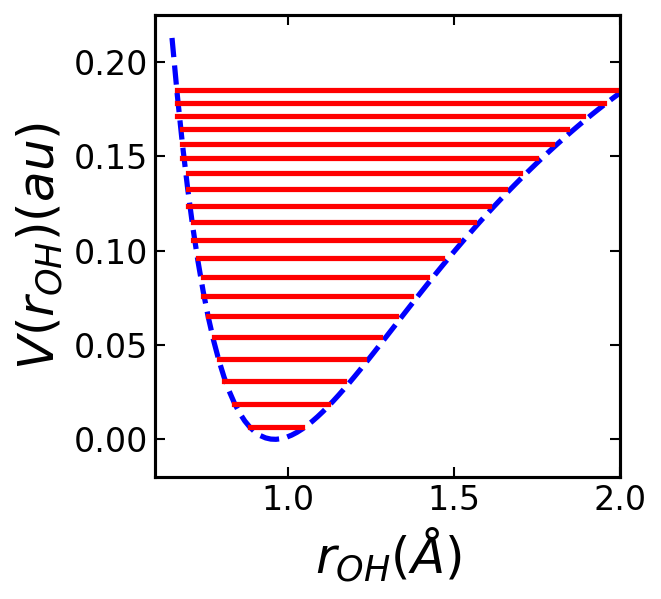

In [21]:
fig = plt.figure(figsize=(4,4),dpi=150)
display=True
xvals = np.linspace(0.65, 2.2, 100)

constants = ConstantsManagement()
plt.plot(xvals, dvr.pot1d.pot_fit['poly'](xvals, *dvr.pot1d.pot_fit['popt']), c='blue', ls = '--')
#plt.scatter(dvr.pot1d.rOH, dvr.pot1d.pot_energy, c='black', s=20)
#plt.scatter(dvr.xgrid*constants.angperau, dvr.pot1d.pot_fit['poly'](dvr.xgrid*constants.angperau, *dvr.pot1d.pot_fit['popt']), c='red')
if display:
    for eval in dvr.evals[:20]:
        # find the two intersectiosn between dvr.pot1d.pot_fit['poly'](xvals, *dvr.pot1d.pot_fit['popt']) and the eval
        lower = np.argmin(np.abs(dvr.pot1d.pot_fit['poly'](xvals[xvals<1.0], *dvr.pot1d.pot_fit['popt']) - eval))
        upper = np.argmin(np.abs(dvr.pot1d.pot_fit['poly'](xvals[xvals>1.0], *dvr.pot1d.pot_fit['popt']) - eval)) + len(xvals[xvals<1.0])
        plt.plot(xvals[lower:upper], [eval] * len(xvals[lower:upper]), c='red')
plt.xlabel("$r_{OH} (\AA)$")
plt.ylabel("$V(r_{OH}) (au)$")
plt.xlim(0.6,2)
plt.ylim(-0.02,0.225)
plt.show()


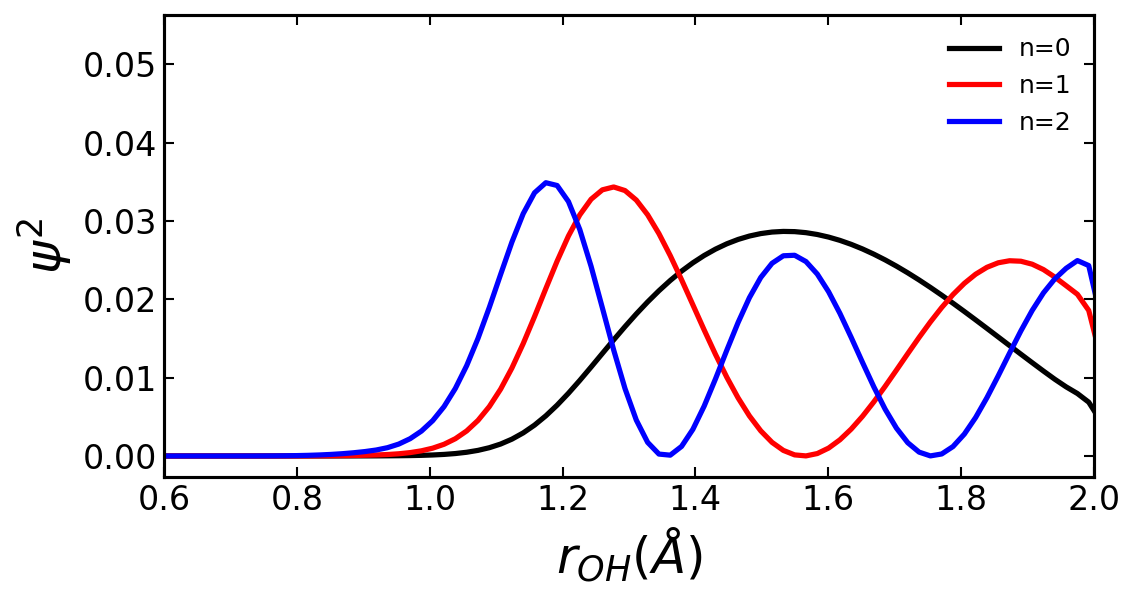

In [22]:
fig = plt.figure(figsize=(8,4),dpi=150)
plt.plot(dvr.xgrid*constants.angperau, np.multiply(dvr.evecs[0], dvr.evecs[0]), c='black', label='n=0')
plt.plot(dvr.xgrid*constants.angperau, np.multiply(dvr.evecs[1], dvr.evecs[1]), c='red', label='n=1')
plt.plot(dvr.xgrid*constants.angperau, np.multiply(dvr.evecs[2], dvr.evecs[2]), c='blue', label='n=2')
plt.xlim(0.6,2)
plt.legend(frameon=False)
plt.xlabel("$r_{OH} (\AA)$")
plt.ylabel("$\psi^2$")
plt.show()